In [122]:
import requests
from IPython.core.display import HTML
HTML(f"""
<style>
</style>
""")

# Model selection and descriptive statistics
In this exercise, you are given noisy data and methods to fit polynomial models multiple times to different subsets of the data. Your task is to use descriptive statistics (such as mean, variance, covariance, and correlation) to analyze the performance of these models and reflect on how well they fit the data. You will investigate how
- the models capture the underlying data 
- the fit varies across different subsets of training data
- assess how well the models perform on unseen data.

## Functions and libraries
The cell below contains functions for generating a noisy dataset and fitting a polynomial multiple times to different subsets of the generated data. More specifically:
1. `generate_polynomial(x, coeffs)`
: Generates ground truth data from the underlying function for a polynomial given the coefficients.
2. `add_gaussian_noise(y, mean, variance, num_outliers)`
: Adds Gaussian noise with a specified **mean** and **variance** and a number of outliers (`num_outliers`
) to simulate noisy data.
3. `fit_polynomial(x, y, M, N)`
: Samples  $M$  random points  $(x, y)$ from the dataset and fits an $N$-th order polynomial to the points. The function returns the fitted coefficients and the mean squared error (MSE) of the fit.
4. `iterate_fit(x, y, M, N, K)`
: Performs the polynomial fitting $K$ times, each time sampling  $M$  points  $(x, y)$  and fitting a polynomial of order $N$. The method returns the mean and variance of the MSE fits of each iteration, the mean of the fitted coefficients, and their covariance and correlation matrices.

## Model Fitting

---
**Task 1 (easy): Fitting the models👩‍💻**
1. Run the cells below to create the inputs `x_range`
 and the noisy outputs `y_noisy`

2. Use the `iterate_fit()`
 function to fit a 2nd-order polynomial to the generated inputs and outputs. Fit the model 100 times, sampling 20 points as the training data in each iteration.


---

In [123]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to generate polynomial values
def generate_polynomial(x, coeffs):
    return np.polyval(coeffs, x)

# Function to add Gaussian noise and outliers
def add_gaussian_noise(y, mean, variance, num_outliers):
    noisy_y = y + np.random.normal(mean, np.sqrt(variance), len(y))
    
    # Add outliers
    outlier_indices = np.random.choice(range(len(noisy_y)), size=num_outliers, replace=False)
    for idx in outlier_indices:
        noisy_y[idx] += 10 * variance  # Adding large variance to simulate outliers
    
    return noisy_y

# Function to sample M points and fit a polynomial of order N
def fit_polynomial(x, y, M, N):
    # Randomly sample M points from the dataset
    indices = np.random.choice(len(x), M, replace=False)
    x_sampled = x[indices]
    y_sampled = y[indices]
    
    # Fit a polynomial of order N to the sampled points
    coeffs = np.polyfit(x_sampled, y_sampled, N)
    fitted_poly = np.poly1d(coeffs)
    
    # Calculate loss (mean squared error)
    y_fitted = fitted_poly(x_sampled)
    mse = np.mean((y_sampled - y_fitted) ** 2)
    
    return mse, coeffs


# Function to iterate K times, fit the model and compute mean/variance of errors and params
def iterate_fit(x, y, M, N, K):
    errors = []
    coeffs_list = []
    
    for _ in range(K):
        mse, coeffs = fit_polynomial(x, y, M, N)
        errors.append(mse)
        coeffs_list.append(coeffs)
    
    # Convert lists to arrays for easier manipulation
    errors = np.array(errors)
    coeffs_array = np.array(coeffs_list)
    
    # Compute statistics
    error_mean = np.mean(errors)
    error_variance = np.var(errors, ddof=1)
    coeffs_mean = np.mean(coeffs_array, axis=0)
    coeffs_covariance = np.cov(coeffs_array, rowvar=False)
    coeffs_correlation = np.corrcoef(coeffs_array, rowvar=False)
    
    return errors, coeffs_array, error_mean, error_variance, coeffs_mean, coeffs_covariance, coeffs_correlation

# Function for plotting, to prepare error bars
def prepare_error_bars(means, variances):
    std = np.sqrt(variances)
    lower_bound = np.maximum(0, np.array(means) - std)
    upper_bound = np.array(means) + std
    return [np.array(means) - lower_bound, upper_bound - np.array(means)]

In [124]:
# Parameters for the dataset
coefficients = [1, -2, 3]  # Coefficients for the polynomial (change as needed)
x_range = np.linspace(-10, 10, 100)  # Range of x values
mean = 0  # Mean for the Gaussian noise
variance = 50  # Variance for the Gaussian noise
num_outliers = 5  # Number of outliers to introduce

# Generate noise-free polynomial dataset
y_clean = generate_polynomial(x_range, coefficients)

print("y_clean:")
print(y_clean)

# Generate dataset with Gaussian noise and outliers
y_noisy = add_gaussian_noise(y_clean, mean, variance, num_outliers)
print("y_noisy:")
print(y_noisy)

# Write your code here
K = 100
M = 20
N = 2
errors, coeffs_array, error_mean, error_variance, coeffs_mean, coeffs_covariance, coeffs_correlation = iterate_fit(x_range, y_noisy, M, N, K)

y_clean:
[123.         118.59636772 114.27435976 110.03397612 105.87521681
 101.79808183  97.80257117  93.88868483  90.05642281  86.30578512
  82.63677176  79.04938272  75.543618    72.1194776   68.77696153
  65.51606979  62.33680237  59.23915927  56.2231405   53.28874605
  50.43597592  47.66483012  44.97530864  42.36741149  39.84113866
  37.39649015  35.03346597  32.75206612  30.55229058  28.43413937
  26.39761249  24.44270993  22.56943169  20.77777778  19.06774819
  17.43934292  15.89256198  14.42740537  13.04387307  11.74196511
  10.52168146   9.38302214   8.32598714   7.35057647   6.45679012
   5.6446281    4.9140904    4.26517702   3.69788797   3.21222324
   2.80818284   2.48576676   2.244975     2.08580757   2.00826446
   2.01234568   2.09805122   2.26538108   2.51433527   2.84491378
   3.25711662   3.75094378   4.32639527   4.98347107   5.72217121
   6.54249566   7.44444444   8.42801755   9.49321498  10.64003673
  11.86848281  13.17855321  14.57024793  16.04356698  17.59851036
 


---
**Task 2 (medium): Plotting the results👩‍💻💡📽️**
1. Run the cell below to display the fitted polynomial models and the mean fitted polynomial over the noisy data.

2. What does the variability of the fitted polynomials say about the complexity of the underlying function?

3. Repeat the model fitting process with the same parameters as before, but using noisy data with 5 and 15 outliers. 

4. Compare the results of having 0, 5 and 15 outliers. How do the outliers impact the variability of the individual models and the mean fitted polynomial?

5. Repeat the model fitting process with the same parameter as before, but set the number of outliers to 0 and adjust the noise variance to 150 and then to 650. 

6. How is the mean fitted polynomial affected by the increase in the noise variance? Does noise affect the model similarly to outliers? 



---

In [125]:
# Write your reflections here...

# ---------2---------
# Variability is the spread of grey lines. One gray line is a fitted 2. order polynomial? Before -5 and after 5 they spread out even more. 
# It kind of follows the line of the data, but exagerates in the ends. The model is low in complexity since it's a second order polynomial.

# -------3--------
#DONE

# -------4---------
# With 0 outliers there is a lot less variability. The mean fitted polynomial fits exactly on to of the individual polynomials.
# With 5 outliers it's like discussed before. The individual ploynomials are more spread out in the ends. 
# With 15 outliers the mean fitted polynomial is far away from the ground truth

# -------6--------- (CHAT)
# Increasing noise variance makes the fitted polynomials vary more around the true function, 
# but the mean fitted polynomial stays roughly the same. Noise causes random spread, 
# while outliers can bias the model and pull the fit away from the true curve.

#(i.e. It means that if you repeated the fitting process many times with different random noise,
# and then averaged all the fitted polynomials, that average curve would still be close to the 
# true underlying function — even though each individual fit might fluctuate due to the noise.)


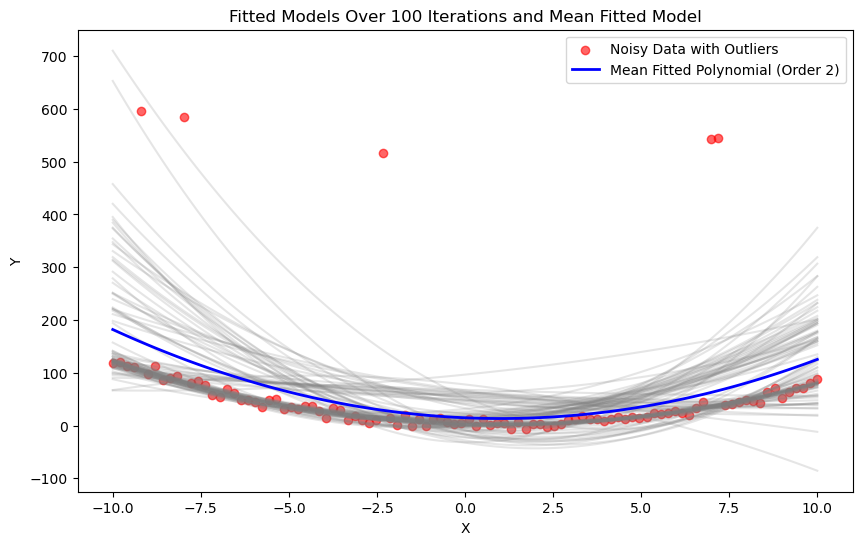

In [126]:
# Plot all fitted models and the mean fitted polynomial
plt.figure(figsize=(10, 6))
plt.scatter(x_range, y_noisy, label='Noisy Data with Outliers', color='red', alpha=0.6)

# Plot all fitted models from the iterations
for i in range(K):
    fitted_poly = np.poly1d(coeffs_array[i])
    plt.plot(x_range, fitted_poly(x_range), color='gray', alpha=0.2)

# Plot the mean fitted polynomial
fitted_mean_poly = np.poly1d(coeffs_mean)
plt.plot(x_range, fitted_mean_poly(x_range), label=f'Mean Fitted Polynomial (Order {N})', color='blue', linewidth=2)

plt.title(f"Fitted Models Over {K} Iterations and Mean Fitted Model")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

## Generalizability

---
**Task 3 (medium): Test set MSE👩‍💻**
The following task will modify the `fit_polynomial()`
 and the `iterate_fit()`
 functions to test the model's performance on unseen data.
1. Modify the `fit_polynomial()`
 function:    - Uncomment the line under `# Comment1`
 to create a test set and read the documentation on  [`np.setdiff1d()`
](https://numpy.org/doc/2.0/reference/generated/numpy.setdiff1d.htmls)

    - Compute `y_fitted_test`
 by applying the polynomial model to the inputs in the test set.
    - Calculate the mean squared error (MSE) for the model’s predictions on the test data and store it in `mse_test`
.


2. Modify the `iterate_fit()`
 function:    - Calculate the mean (`error_mean_test`
) and variance (`error_variance_test`
) of the test errors and let the function return these values. 


3. Generate noisy outputs with the variance of the Gaussian noise set to $100$ and no outliers. 
4. Use the generated data to fit a 2nd-order polynomial using  `iterate_fit()`
. Fit the model 100 times, sampling 20 points in each iteration.


---

In [127]:
# 1.

def fit_polynomial(x, y, M, N):
    # Randomly sample M points from the dataset for training
    indices = np.random.choice(len(x), M, replace=False)
    x_sampled = x[indices]
    y_sampled = y[indices]
    
    # Use the remaining points as the test set
    # Comment1
    test_indices = np.setdiff1d(np.arange(len(x)), indices)
    x_test = x[test_indices]
    y_test = y[test_indices]

    
    # Fit a polynomial of order N to the sampled points
    coeffs = np.polyfit(x_sampled, y_sampled, N)
    fitted_poly = np.poly1d(coeffs)
    
    # Calculate training loss (mean squared error) on the sampled points
    y_fitted_train = fitted_poly(x_sampled)
    mse_train = np.mean((y_sampled - y_fitted_train) ** 2)
    
    # Calculate test loss (mean squared error) on the remaining points (unseen data)
    y_fitted_test = fitted_poly(x_test)
    mse_test = np.mean((y_test - y_fitted_test) ** 2)

    return mse_train, mse_test, coeffs


# 2. 
def iterate_fit(x, y, M, N, K):
    errors_train = []
    errors_test = []
    coeffs_list = []
    
    for _ in range(K):
        # Get both training and test errors from fit_polynomial
        mse_train, mse_test, coeffs = fit_polynomial(x, y, M, N)
        errors_train.append(mse_train)
        errors_test.append(mse_test)
        coeffs_list.append(coeffs)
    
    # Convert lists to arrays for easier manipulation
    errors_train = np.array(errors_train)
    errors_test = np.array(errors_test)
    coeffs_array = np.array(coeffs_list)
    
    # Compute statistics for training errors
    error_mean_train = np.mean(errors_train)
    error_variance_train = np.var(errors_train, ddof=1)
    
    # Compute statistics for test errors
    error_mean_test = np.mean(errors_test)
    error_variance_test = np.var(errors_test, ddof=1)

    # Compute coefficient statistics
    coeffs_mean = np.mean(coeffs_array, axis=0)
    coeffs_covariance = np.cov(coeffs_array, rowvar=False)
    coeffs_correlation = np.corrcoef(coeffs_array, rowvar=False)
    
    return (errors_train, errors_test, coeffs_array, 
            error_mean_train, error_variance_train, 
            error_mean_test, error_variance_test, 
            coeffs_mean, coeffs_covariance, coeffs_correlation)
    
# Set parameters for sampling and fitting
M = 20  # Number of samples to use
N = 2   # Order of the polynomial to fit
K = 100  # Number of iterations

# 3.

# Generate noisy outputs
# Write your solution here
variance = 100  # Variance for the Gaussian noise
num_outliers = 0  # Number of outliers to introduce
y_noisy = add_gaussian_noise(y_clean, mean, variance, num_outliers)

# 4.  

# Apply the updated iterate_fit(function)
# Write your code here
errors_train, errors_test, coeffs_array, error_mean_train, error_variance_train, error_mean_test, error_variance_test, coeffs_mean, coeffs_covariance, coeffs_correlation = iterate_fit(x_range, y_noisy, M, N, K)


---
**Task 4 (medium): Evaluation on test set💡📽️**
Run the cell below to plot the training and testing error values for each iteration (line plot on top), along with the mean errors for both the training and testing sets (box plot on bottom). Reflect on: 
1. How does the trend of the training MSE (as seen in the line plot) compare to the trend of the test MSE over the 100 iterations?
2. What role does the variance in the test MSE play in understanding the model’s robustness on unseen data?
3. Are there any clear outliers in the boxplot for either the mean training or test MSE? How might outliers affect your understanding of the model’s performance?
4. From the boxplot, do the distributions of training and test MSE overlap significantly, or are they visibly different? What does this suggest about the generalization capability of the model?
5. Based on the line plot, do any iterations show large fluctuations in the test MSE compared to the training MSE? How does this align with what you observe in the boxplot?
6. Given the boxplot’s visualization of the MSE distributions, do the whiskers (range) for the train MSE extend further than those for the test MSE? What could explain the larger variance in train errors?


**Hint**
Take the size of the training and testing sets into consideration.


---

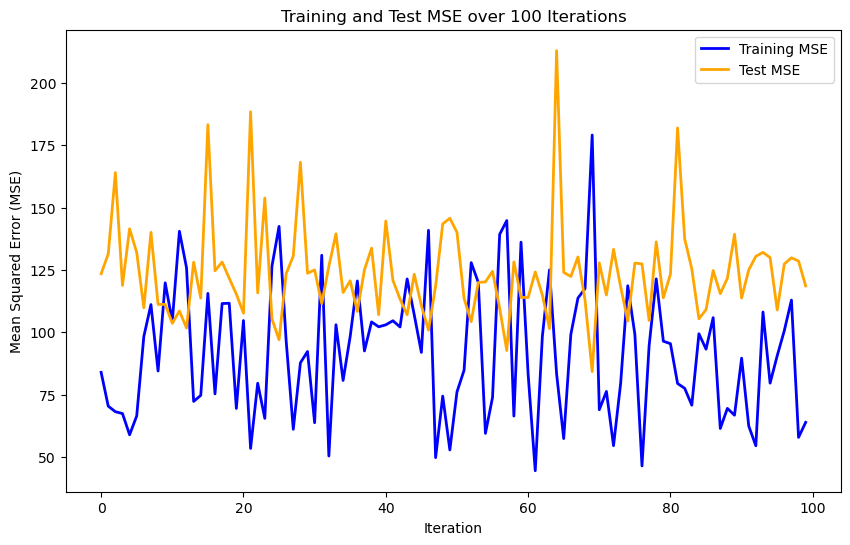

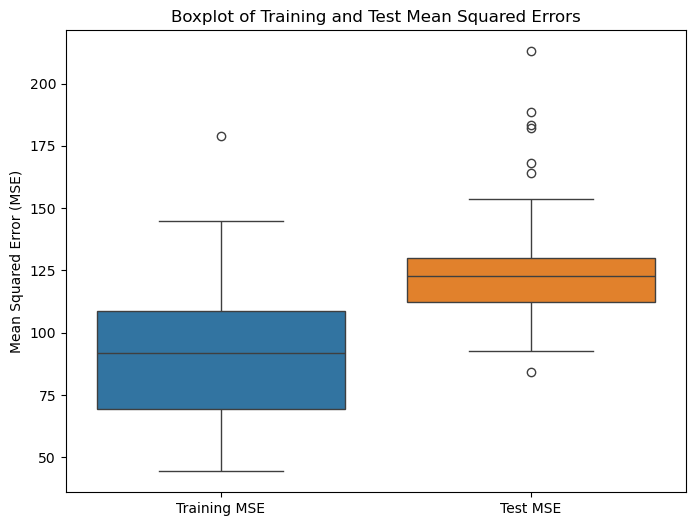

In [128]:
# Plot the training and test MSE over 100 iterations
plt.figure(figsize=(10, 6))
plt.plot(range(K), errors_train, label='Training MSE', color='blue', linewidth=2)
plt.plot(range(K), errors_test, label='Test MSE', color='orange', linewidth=2)
plt.title('Training and Test MSE over 100 Iterations')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()

# Boxplot of the training and test MSE
plt.figure(figsize=(8, 6))
sns.boxplot(data=[errors_train, errors_test])
plt.xticks([0, 1], ['Training MSE', 'Test MSE'])
plt.title('Boxplot of Training and Test Mean Squared Errors')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()

In [129]:
#Write your reflections here...

# -----1-----
# It has been trained on the training data, so here the MSE should be relatively low. 
# Whereas the test data is unknown and random so we should see a higher numeber of mean squared errors. If we make a mean of the MSE lines 
# the test data line would probably be 100 lower than the training data.

# -----2-----
# The varience in test MSE helps us understand how robust the model is in unseen data. If the varience is very high 
# then we expect the model to not be very robust. Since a high variance means that the model is not able to generalize the data. 
# the lower the variance, the more robust the model is on unseen data.
# High variance in the Test MSE (as seen in the provided plot where the orange line fluctuates significantly) indicates 
# that the model's generalization performance is unstable and highly dependent on the specific random sample of data it was trained on. 
# A new, unseen dataset will likely result in a test error that can vary widely, making the model unreliable in real-world scenarios.

# -----3-----
# There are multiple outliers on the test MSE, and not any on training MSE. If there are many outliers in test MSE 
# could be that the test data is not representitive, and is to narrowly trained. 
# It might also show the model at performing worse on the test data.

# -----4-----

# They do overlap. Most of test MSE can fit into training MSE. Most of test MSE data are in the last 25% of training MSE. 
# Test MSE is in general shifted opwards, it is higher on the y-axis and the median is over training MSE median.
# The fact that the test MSE is much higher than training MSE could be a sign that the model is overfitted.
# The model has learned some of the noise of the training data and does not generalize as well.
# High variance means less gereralizeable.

# -----5------

# Large fluctuations in the line plot are also shown on the boxplot as outliers. The line plot for the test MSE is often more compact
# With some large fluctuations, which makes sense because the boxplot is also smaller but has more outliers than on the training data.

# It is also shown from the line plot, that in some cases where the training MSE is low, then the 
# Test MSE is way higher. This could show that the model has been overfitted on the training data, 
# and can therefore not generalize this model very well to unseen data.

# ------6------

# There are 100 samples in total. We give the training set 20 samples, so the test set must have 80 samples.
# Yes the whiskers of train MSE extend further than test MSE. The training set is small so there is not much to train on,
# and the spread between the points is higher. Since the training set is 20 random samples from 100 there is also a chance that
# the training is done on samples that are not general for the whole set i.e. it could potentially be trained only on outliers.

# The larger variance in training errors arises because each training subset is small and randomly chosen, 
# leading to more fluctuation in how well the model fits those particular samples — not because smaller sets 
# inherently increase the variance of training error values.




## Model complexity

---
**Task 5 (medium): Polynomial order👩‍💻💡**
This task experiments with fitting an increasingly more complex model to the data. The cell below performs polynomial fitting for the orders defined in the `degrees`
 array and stores the mean and variance of the training and test errors.
1. Run the cell below to visualize the mean and variance of the training and testing MSEs across different model degrees. How does increasing model complexity impact the training and testing errors?
2. Inspect the graph and identify at which degree does the model seem to overfit? Reflect on how this corresponds to the underlying function.
3. Observe how the model parameters change as the polynomial order increases. Explain the reasons for the observations on the higher-order terms.


---

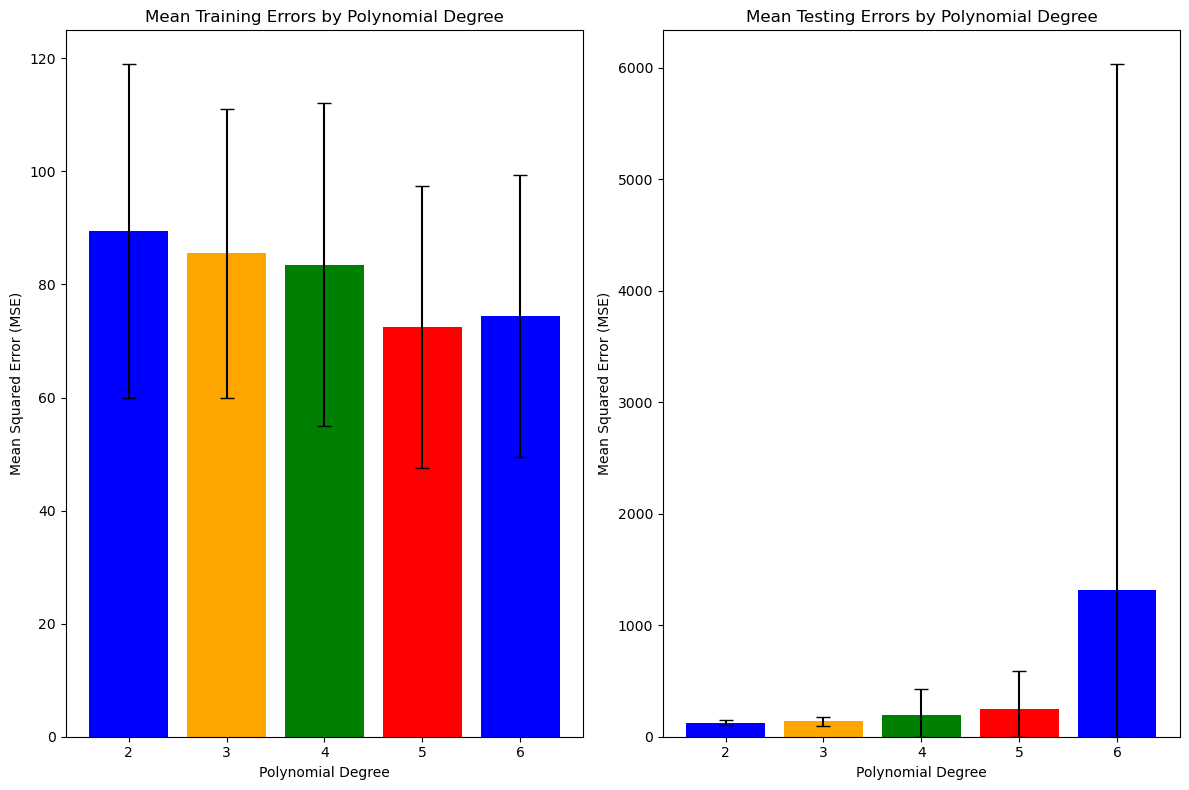

In [130]:
degrees = [2, 3, 4, 5, 6]  # 1st, 2nd, 3rd, and 4th order polynomials

# Initialize dictionaries to store the training and test error means and variances for each degree
error_means_train = {}
error_variances_train = {}
error_means_test = {}
error_variances_test = {}

# Set parameters for sampling and fitting
M = 20  # Number of samples to use
K = 100  # Number of iterations

# Loop through each polynomial degree
for N in degrees:
    
    # Perform the iterative fitting process for the current polynomial degree
    errors_train, errors_test, _, error_mean_train, error_variance_train, error_mean_test, error_variance_test, _, _, _ = iterate_fit(x_range, y_noisy, M, N, K)
    
    # Store the results for training and test sets
    error_means_train[N] = error_mean_train
    error_variances_train[N] = error_variance_train
    error_means_test[N] = error_mean_test
    error_variances_test[N] = error_variance_test
    

# Data preparation
mean_training_errors = [error_means_train[d] for d in degrees]
mean_testing_errors = [error_means_test[d] for d in degrees]
training_error_bars = prepare_error_bars(mean_training_errors, [error_variances_train[d] for d in degrees])
testing_error_bars = prepare_error_bars(mean_testing_errors, [error_variances_test[d] for d in degrees])

colors = ['blue', 'orange', 'green', 'red']

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

# Plot training errors
axes[0].bar(degrees, mean_training_errors, color=colors, yerr=training_error_bars, capsize=5)
axes[0].set_xticks(degrees)
axes[0].set_title('Mean Training Errors by Polynomial Degree')
axes[0].set_xlabel('Polynomial Degree')
axes[0].set_ylabel('Mean Squared Error (MSE)')

# Plot testing errors
axes[1].bar(degrees, mean_testing_errors, color=colors, yerr=testing_error_bars, capsize=5)
axes[1].set_xticks(degrees)
axes[1].set_title('Mean Testing Errors by Polynomial Degree')
axes[1].set_xlabel('Polynomial Degree')
axes[1].set_ylabel('Mean Squared Error (MSE)')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# ------- 1 ---------
# The black lines are error bars. The blocks are the mean. The error bars show the variance of the sample, which make sense 
# that the variance in the variance in the test set is a lot higher than on the training set.
# Increasing model complexity makes the training errors smaller, this is due to overfitting because we can see that increasing the complexity
# gives more errors on the test set. Increasing the complecity increases the variablity of the mean value.


# --------- 2 -----------
# We need to find where the gap between training MSE and test MSE is the smallest.
# From degree 4 to five there is a big jump in the test MSE but not in the traingin MSE so the gap gets a lot bigger. 
# So it deffinetly overfit the model with degree 5 and 6. It is overfitted in degree 5 and 6
# But since degree 2 and 3 have the smallest test MSE these would be the best degrees
# to use. Always go for the smallest polynomial degree. I think 2. degree is best.
# The underlying function is also a second degree plynomial which aligns 

# --------- 3 ----------
# In short, the unstable, large magnitude of the higher-order parameters 
# is what causes the long error bars and high mean you see for the Test MSE at high polynomial degrees.


---
**Task 6 (hard): Model parameters👩‍💻💡📽️**
1. Run the cell below to fit a 5th-order polynomial to the data and visualize the covariance and correlation matrices of the model parameters. 
2. Answer the following questions:    

    0. Which pairs of coefficients show high levels of covariance/correlation? 

    a. What does the variance of the model parameters say about the performance? 

    b. Could this suggest that some coefficients remain relatively stable across different samples?

    c. What does the covariance of the model parameters reveal about the performance of the model? 

    d. What does this reveal about model stability? 

    e. Could this indicate overfitting or sensitivity to changes in the dataset?

    f. What does the correlations between coefficients say about the redundancy of model parameters? 

    g. Which model parameters contribute very little to the overall model?

    h. What is the difference between the covariance and correlation when analyzing the data?


---

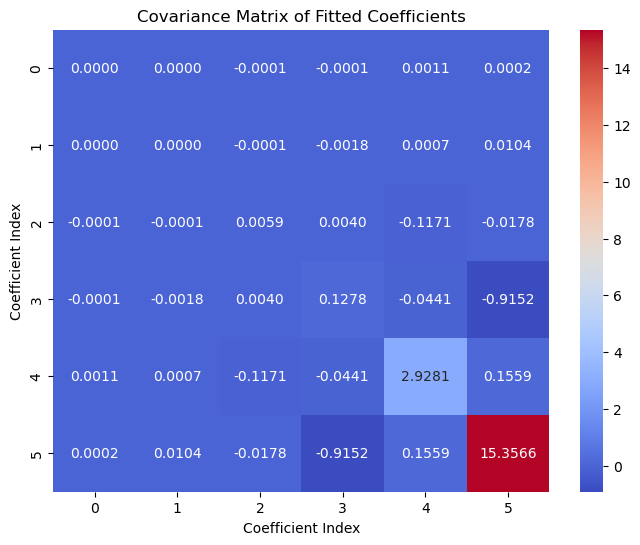

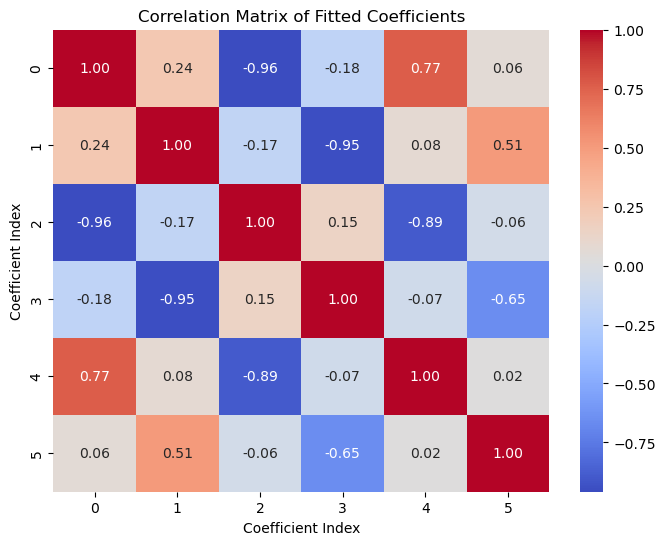

In [132]:
# Set parameters for sampling and fitting
M = 20  # Number of samples to use
K = 100  # Number of iterations
N = 5
errors_train, errors_test, coeffs_array, error_mean_train, error_variance_train, error_mean_test, error_variance_test, coeffs_mean, coeffs_covariance, coeffs_correlation = iterate_fit(x_range, y_noisy, M, N, K)

# Plot the covariance matrix of the fitted polynomial coefficients
plt.figure(figsize=(8, 6))
sns.heatmap(coeffs_covariance, annot=True, fmt='.4f', cmap='coolwarm', cbar=True)
plt.title('Covariance Matrix of Fitted Coefficients')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Index')
plt.show()

# Plot the covariance matrix of the fitted polynomial coefficients
plt.figure(figsize=(8, 6))
sns.heatmap(coeffs_correlation, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Fitted Coefficients')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Index')
plt.show()

In [ ]:
#------- 0 ---------
#High correlations (from Image 2):
# Coefficients 0 & 2: -0.96 (very strong negative)
# Coefficients 1 & 3: -0.93 (very strong negative)
# Coefficients 2 & 4: -0.90 (very strong negative)
# Coefficients 3 & 5: -0.78 (strong negative)
# Coefficients 0 & 4: 0.75 (strong positive)
# Coefficients 1 & 5: 0.57 (moderate positive)

# High covariances (from Image 1):
# Coefficients 5 & 5: 21.3157 (variance of coefficient 5)
# Coefficients 4 & 4: 2.6130 (variance of coefficient 4)
# Coefficient 3 & 5: -1.0215

# -------- a ---------
#The diagonal elements show dramatically different variances:
# Coefficient 5 (highest order): variance = 21.32 (extremely high)
# Coefficient 4: variance = 2.61 (moderately high)
# Coefficients 0-3: variances ≈ 0.0000 to 0.08 (very low)

#Implications:
# Poor stability: The high-order coefficients have enormous uncertainty, suggesting they're poorly constrained by the data
# Unreliable predictions: The model's behavior at the polynomial extremes will vary wildly across different samples
# Lower-order coefficients (0-3) are stable and well-determined


# --------- b ----------
# Coefficients 0-3 have very low variances (≈0.0000-0.08), indicating they remain highly stable across different samples
# Coefficients 4-5 have high variances, indicating they are highly unstable and would change dramatically with different data samples

# This suggests the underlying relationship might be better captured by a lower-order polynomial (3rd or 4th order).

# ---------- c + d -------- ???????? I DO NOT UNDERSTAND THIS!!!!!!!!!!!
# Negative covariances between adjacent/alternating coefficients indicate:
# Compensatory behavior: When one coefficient increases, others decrease to maintain fit
# Trade-offs: Multiple parameter combinations can produce similar fits
# Ill-conditioned problem: The model is trying to fit high-order terms that may be unnecessary

# Model stability issues:
# Large covariances (especially with coefficient 5) show parameters are interdependent
# Small changes in data could cause large, coordinated changes in multiple coefficients
# The model lacks uniqueness in its parameter estimates



# ----------- e -----------
# Yes, strong indicators of overfitting:

# High variance in higher-order terms: Classic sign the model is fitting noise
# Strong negative correlations: Parameters are compensating for each other, suggesting redundancy
# Extreme sensitivity: Coefficient 5's variance of 21.32 means tiny data changes cause huge parameter swings
# Unstable high-order terms: A 5th-order polynomial is likely too complex for the underlying relationship

# This model would:

# Fit training data well but generalize poorly
# Show completely different curves with slight data perturbations
# Be unreliable for prediction outside the training range (As can be seen from the previous assignement also.)


# ----------- f -------------

# Strong correlations reveal high redundancy:
# Coefficients 0 & 2 (r=-0.96): Nearly perfectly negatively correlated → highly redundant
# Coefficients 1 & 3 (r=-0.93): Also nearly redundant
# Coefficients 2 & 4 (r=-0.90): Strong redundancy

# Interpretation:
# These coefficient pairs are essentially encoding the same information in different ways
# The polynomial basis functions (x⁰, x¹, x², x³, x⁴, x⁵) are multicollinear for this dataset
# Multiple parameter combinations yield similar fits, making individual parameters poorly identifiable


# ----------- g ---------
# This is tricky - high variance doesn't necessarily mean low contribution, but:

# Likely least important:
# Coefficient 5 (5th order): Despite high variance (21.32), it probably adds mainly noise
# Coefficient 4 (4th order): Variance of 2.61 suggests it's also unstable

# Most reliable/important:
# Coefficients 0-3: Low variances suggest they capture the true underlying signal
# These represent the constant, linear, quadratic, and cubic terms


# ---------- h -----------
#COPY PASTE FROM CHAT:

# Covariance Matrix:
# Scale-dependent: Values reflect the actual units of the coefficients
# Shows absolute variability: Large values indicate large absolute uncertainty
# Useful for: Understanding actual uncertainty magnitudes, error propagation
# Diagonal: Variances of each coefficient
# Off-diagonal: Joint variability between coefficient pairs

# Correlation Matrix:
# Scale-independent: Normalized to [-1, 1] range
# Shows relative relationships: How strongly coefficients move together (independent of units)
# Useful for: Identifying redundancy, multicollinearity, parameter dependencies
# All diagonals = 1: Perfectly correlated with themselves
# Values near ±1: Strong linear relationships

# Key Difference in This Analysis:
# Covariance tells you coefficient 5 has massive uncertainty (21.32)
# Correlation tells you coefficients 0 & 2 are nearly redundant (r=-0.96)
# Both together reveal: unstable high-order terms with interdependent, redundant parameters




